## Weighted Moving Average

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = pd.Series([1, 2, 1, 2, 1, 2, 1])

In [3]:
series

0    1
1    2
2    1
3    2
4    1
5    2
6    1
dtype: int64

### .rolling()

**.rolling(n)** проходится по серии движужимсия окном длиной **n**

Вычислим сумму данных в серии для размера окна 3:

In [4]:
roll_series = series.rolling(3)
for i in roll_series:
    print(i.sum())

1
3
4
5
4
5
4


Второй параметр функции - это **min_period**. Минимальное количество наблюдений в окне, необходимое для получения значения. В противном случае результат **np.nan**.

По умолчанию **min_period** равен размеру окна.

In [5]:
# min_period = 3
series.rolling(3).sum()

0    NaN
1    NaN
2    4.0
3    5.0
4    4.0
5    5.0
6    4.0
dtype: float64

In [6]:
# min_period=2
series.rolling(3, 2).sum()

0    NaN
1    3.0
2    4.0
3    5.0
4    4.0
5    5.0
6    4.0
dtype: float64

### WMA

In [7]:
weights = np.array([1, 1, 2])

Длина массива **weights** должна быть равна размеру окна.

In [8]:
wma_series = series.rolling(3).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
wma_series

0     NaN
1     NaN
2    1.25
3    1.75
4    1.25
5    1.75
6    1.25
dtype: float64

**lambda функция** была применена к каждой серии с длиной, равной длине окна.

### WMA prediction

В предыдущем разделе мы выполнили преобразование временного ряда с попощью WMA. Давайте продолжим этот ряд, т.е. попробуем спрогонозировать несколько значений в будущем:

In [9]:
# прогнозируем 10 значений
for _ in range(10):
    wma_series = wma_series._append(pd.Series([(wma_series[-3:] * (weights / weights.sum())).sum()]), ignore_index=True)

In [10]:
wma_series

0          NaN
1          NaN
2     1.250000
3     1.750000
4     1.250000
5     1.750000
6     1.250000
7     1.375000
8     1.437500
9     1.375000
10    1.390625
11    1.398438
12    1.390625
13    1.392578
14    1.393555
15    1.392578
16    1.392822
dtype: float64

### Отобразим результат на графике

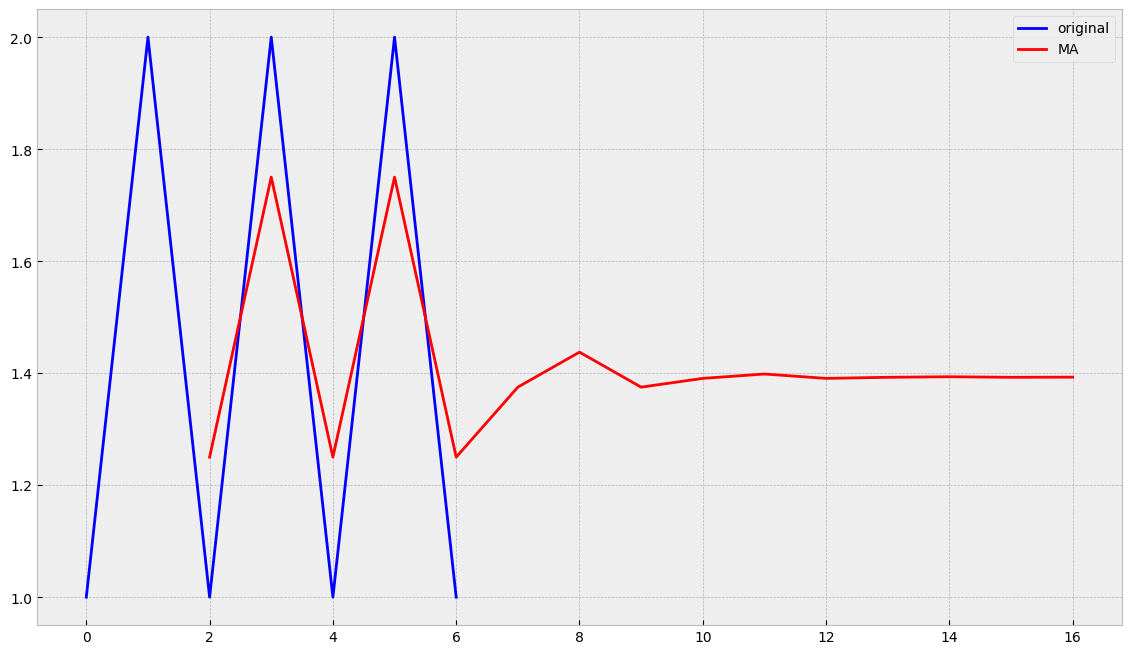

In [13]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue', linewidth='2', label='original')
    plt.plot(wma_series, color='red', linewidth='2', label='MA')
    plt.legend()